# Health Care

#### importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Connecting to google colab & reading data.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# defining file path.

file_path = '/content/drive/MyDrive/Health Care Project/Health Care dataset.xlsx'

In [4]:
# Reading file.

dt = pd.read_excel(file_path)
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dt.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Rnaming columns with the help of data dictionary.

dt.rename({'cp':'Chest_pain_type',
           'trestbps':'Base_line_Blood_Pressure_in_mm',
           'chol':'cholesterol_in_blood_in_mg',
           'fbs':'blood_sugar_higher_than_normal_rang',
           'restecg':'ECG_at_rest',
           'thalach':'Maximum_heart_rate_achieved',
           'exang':'pain_when_heart_muscle_does_not_get_enough_oxygen_during_physical_activity',
           'oldpeak':'reduced_blood_flow_to_heart_muscle_during_physical_activity',
           'ca':'Number_of_major_vessels_colored_by_fluoroscopy',
           'thal':'Maximum_heart_rate_condition_class'},axis = 1,inplace = True)

**Problem Statement**

        Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the
        causes and develop a system to predict heart attacks in an effective manner. The data below has the
        information about the factors that might have an impact on cardiovascular health.




### Task to be performed:

        1.	Preliminary analysis:
              a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
              b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

        2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
              a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
              b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as
                    count plot
              c.	Study the occurrence of CVD across the Age category
              d.	Study the composition of all patients with respect to the Sex category
              e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
              f.	Describe the relationship between cholesterol levels and a target variable
              g.	State what relationship exists between peak exercising and the occurrence of a heart attack
              h.	Check if thalassemia is a major cause of CVD
              i.	List how the other factors determine the occurrence of CVD
              j.	Use a pair plot to understand the relationship between all the given variables
        3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results
         while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection



In [7]:
# Sometimes nans are represented by '?', so replacing them.

dt.replace('?',np.nan,inplace = True)

In [8]:
# Checking nan values.

dt.isna().sum()

age                                                                           0
sex                                                                           0
Chest_pain_type                                                               0
Base_line_Blood_Pressure_in_mm                                                0
cholesterol_in_blood_in_mg                                                    0
blood_sugar_higher_than_normal_rang                                           0
ECG_at_rest                                                                   0
Maximum_heart_rate_achieved                                                   0
pain_when_heart_muscle_does_not_get_enough_oxygen_during_physical_activity    0
reduced_blood_flow_to_heart_muscle_during_physical_activity                   0
slope                                                                         0
Number_of_major_vessels_colored_by_fluoroscopy                                0
Maximum_heart_rate_condition_class      

There are not any nan values in this data.

In [9]:
# Check for duplicates.

dt[dt.duplicated()]

,age,sex,Chest_pain_type,Base_line_Blood_Pressure_in_mm,cholesterol_in_blood_in_mg,blood_sugar_higher_than_normal_rang,ECG_at_rest,Maximum_heart_rate_achieved,pain_when_heart_muscle_does_not_get_enough_oxygen_during_physical_activity,reduced_blood_flow_to_heart_muscle_during_physical_activity,slope,Number_of_major_vessels_colored_by_fluoroscopy,Maximum_heart_rate_condition_class,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


164th entry in the data is duplicate.

In [10]:
# Droping duplicate values.

dt.drop(dt[dt.duplicated()].index,axis = 0,inplace = True)

In [11]:
# data set shape.

dt.shape

(302, 14)

There are **`302 rows`** and **`14 columns`**.

In [12]:
# Information about data.

dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   age                                                                         302 non-null    int64  
 1   sex                                                                         302 non-null    int64  
 2   Chest_pain_type                                                             302 non-null    int64  
 3   Base_line_Blood_Pressure_in_mm                                              302 non-null    int64  
 4   cholesterol_in_blood_in_mg                                                  302 non-null    int64  
 5   blood_sugar_higher_than_normal_rang                                         302 non-null    int64  
 6   ECG_at_rest                                       

**`sign_of_reduced_blood_flow_to_heart_muscle_during_physical_activity`** is *`float type`* and all other are *`int`*.

In [13]:
# check for continues & categorical data.

dt.nunique()

age                                                                            41
sex                                                                             2
Chest_pain_type                                                                 4
Base_line_Blood_Pressure_in_mm                                                 49
cholesterol_in_blood_in_mg                                                    152
blood_sugar_higher_than_normal_rang                                             2
ECG_at_rest                                                                     3
Maximum_heart_rate_achieved                                                    91
pain_when_heart_muscle_does_not_get_enough_oxygen_during_physical_activity      2
reduced_blood_flow_to_heart_muscle_during_physical_activity                    40
slope                                                                           3
Number_of_major_vessels_colored_by_fluoroscopy                                  5
Maximum_heart_ra

**`age, Base_line_Blood_Pressure_in_mm, cholesterol_in_blood_in_mg, Maximum_heart_rate_achieved, reduced_blood_flow_to_heart_muscle_during_physical_activity`** are continuous variables and all other are categorical variables.

****Therefor there are `5` continuous and `9` categorical variables****.

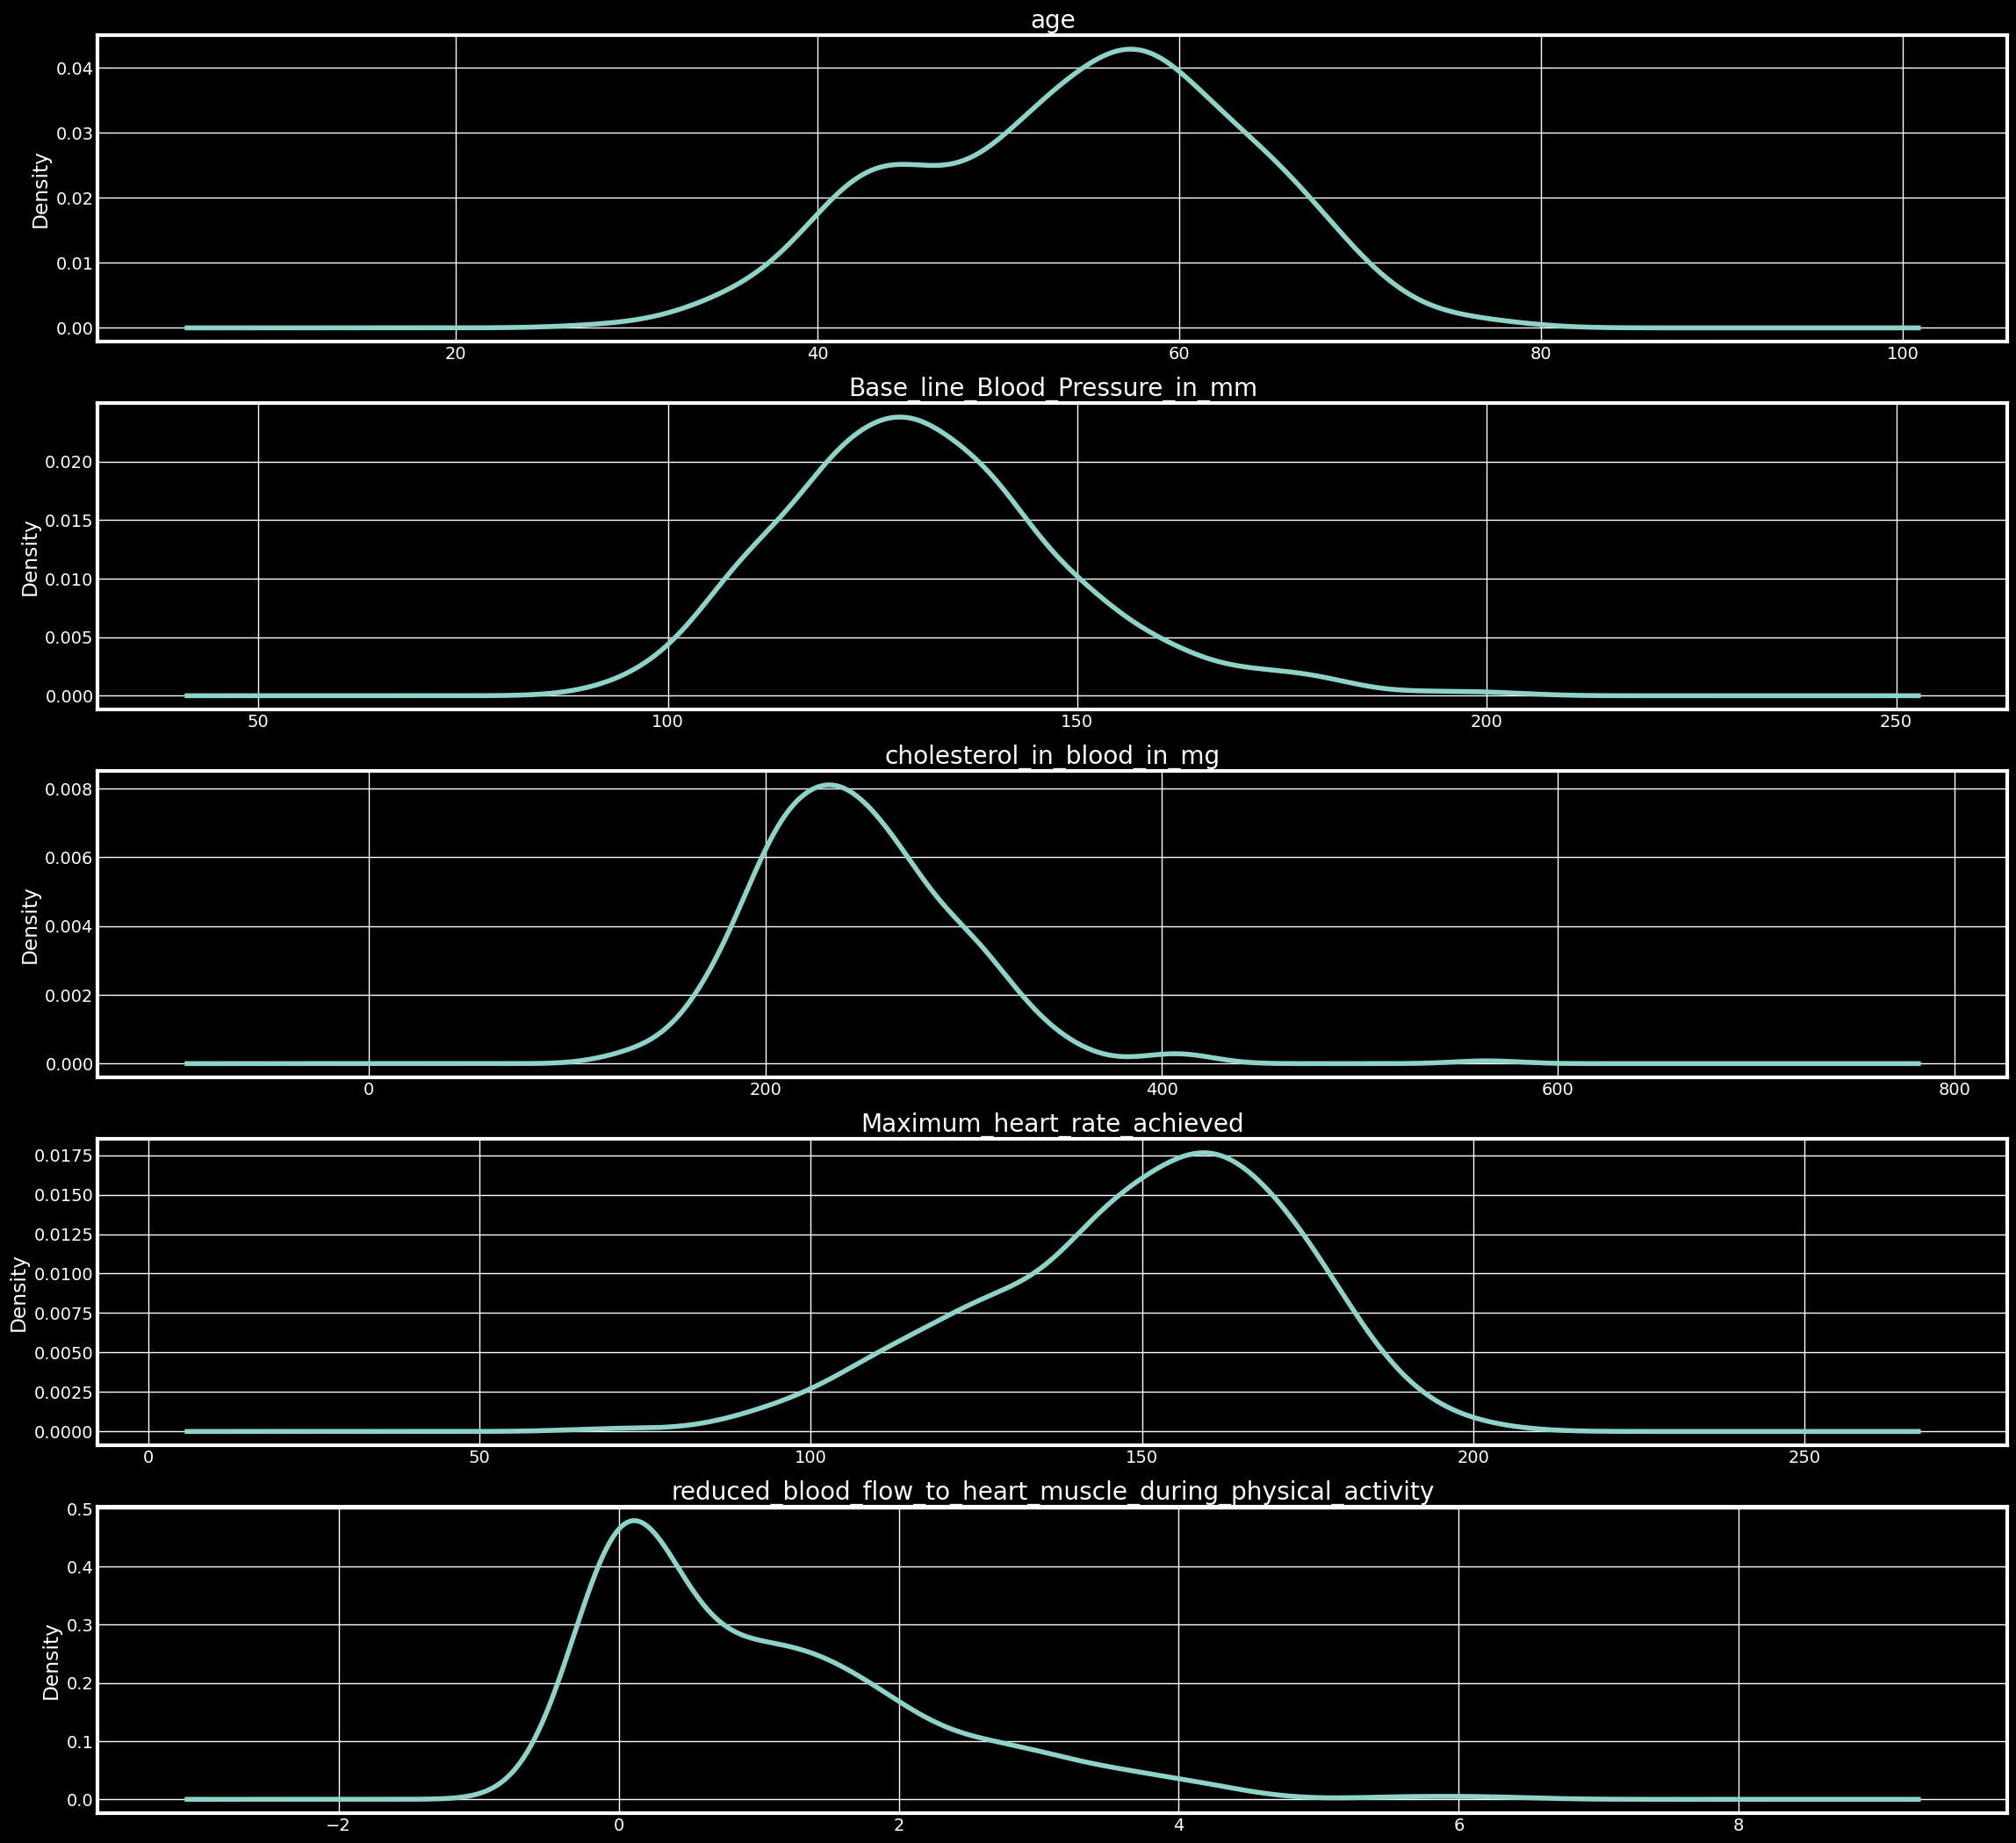

In [14]:
# Storing continuous variables name as list.

conti_vr = ['age', 'Base_line_Blood_Pressure_in_mm', 'cholesterol_in_blood_in_mg',
            'Maximum_heart_rate_achieved', 'reduced_blood_flow_to_heart_muscle_during_physical_activity']


# Checking distribution of all continuous variables.

plt.style.use(['fivethirtyeight','dark_background'])
plt.figure(figsize = (25,25))
for index,col_name in enumerate(conti_vr):
  plt.subplot(5,1,index+1)
  dt[col_name].plot(kind = 'kde')
  plt.title(col_name)

distribution for **`reduced_blood_flow_to_heart_muscle_during_physical_activity, cholesterol_in_blood_in_mg & Base_line_Blood_Pressure_in_mm`** are *`right skewed`*.

And **`'age', 'Maximum_heart_rate_achieved'`** are Normally distributed.

Therefor there are few outliers in not Normally distributed columns.

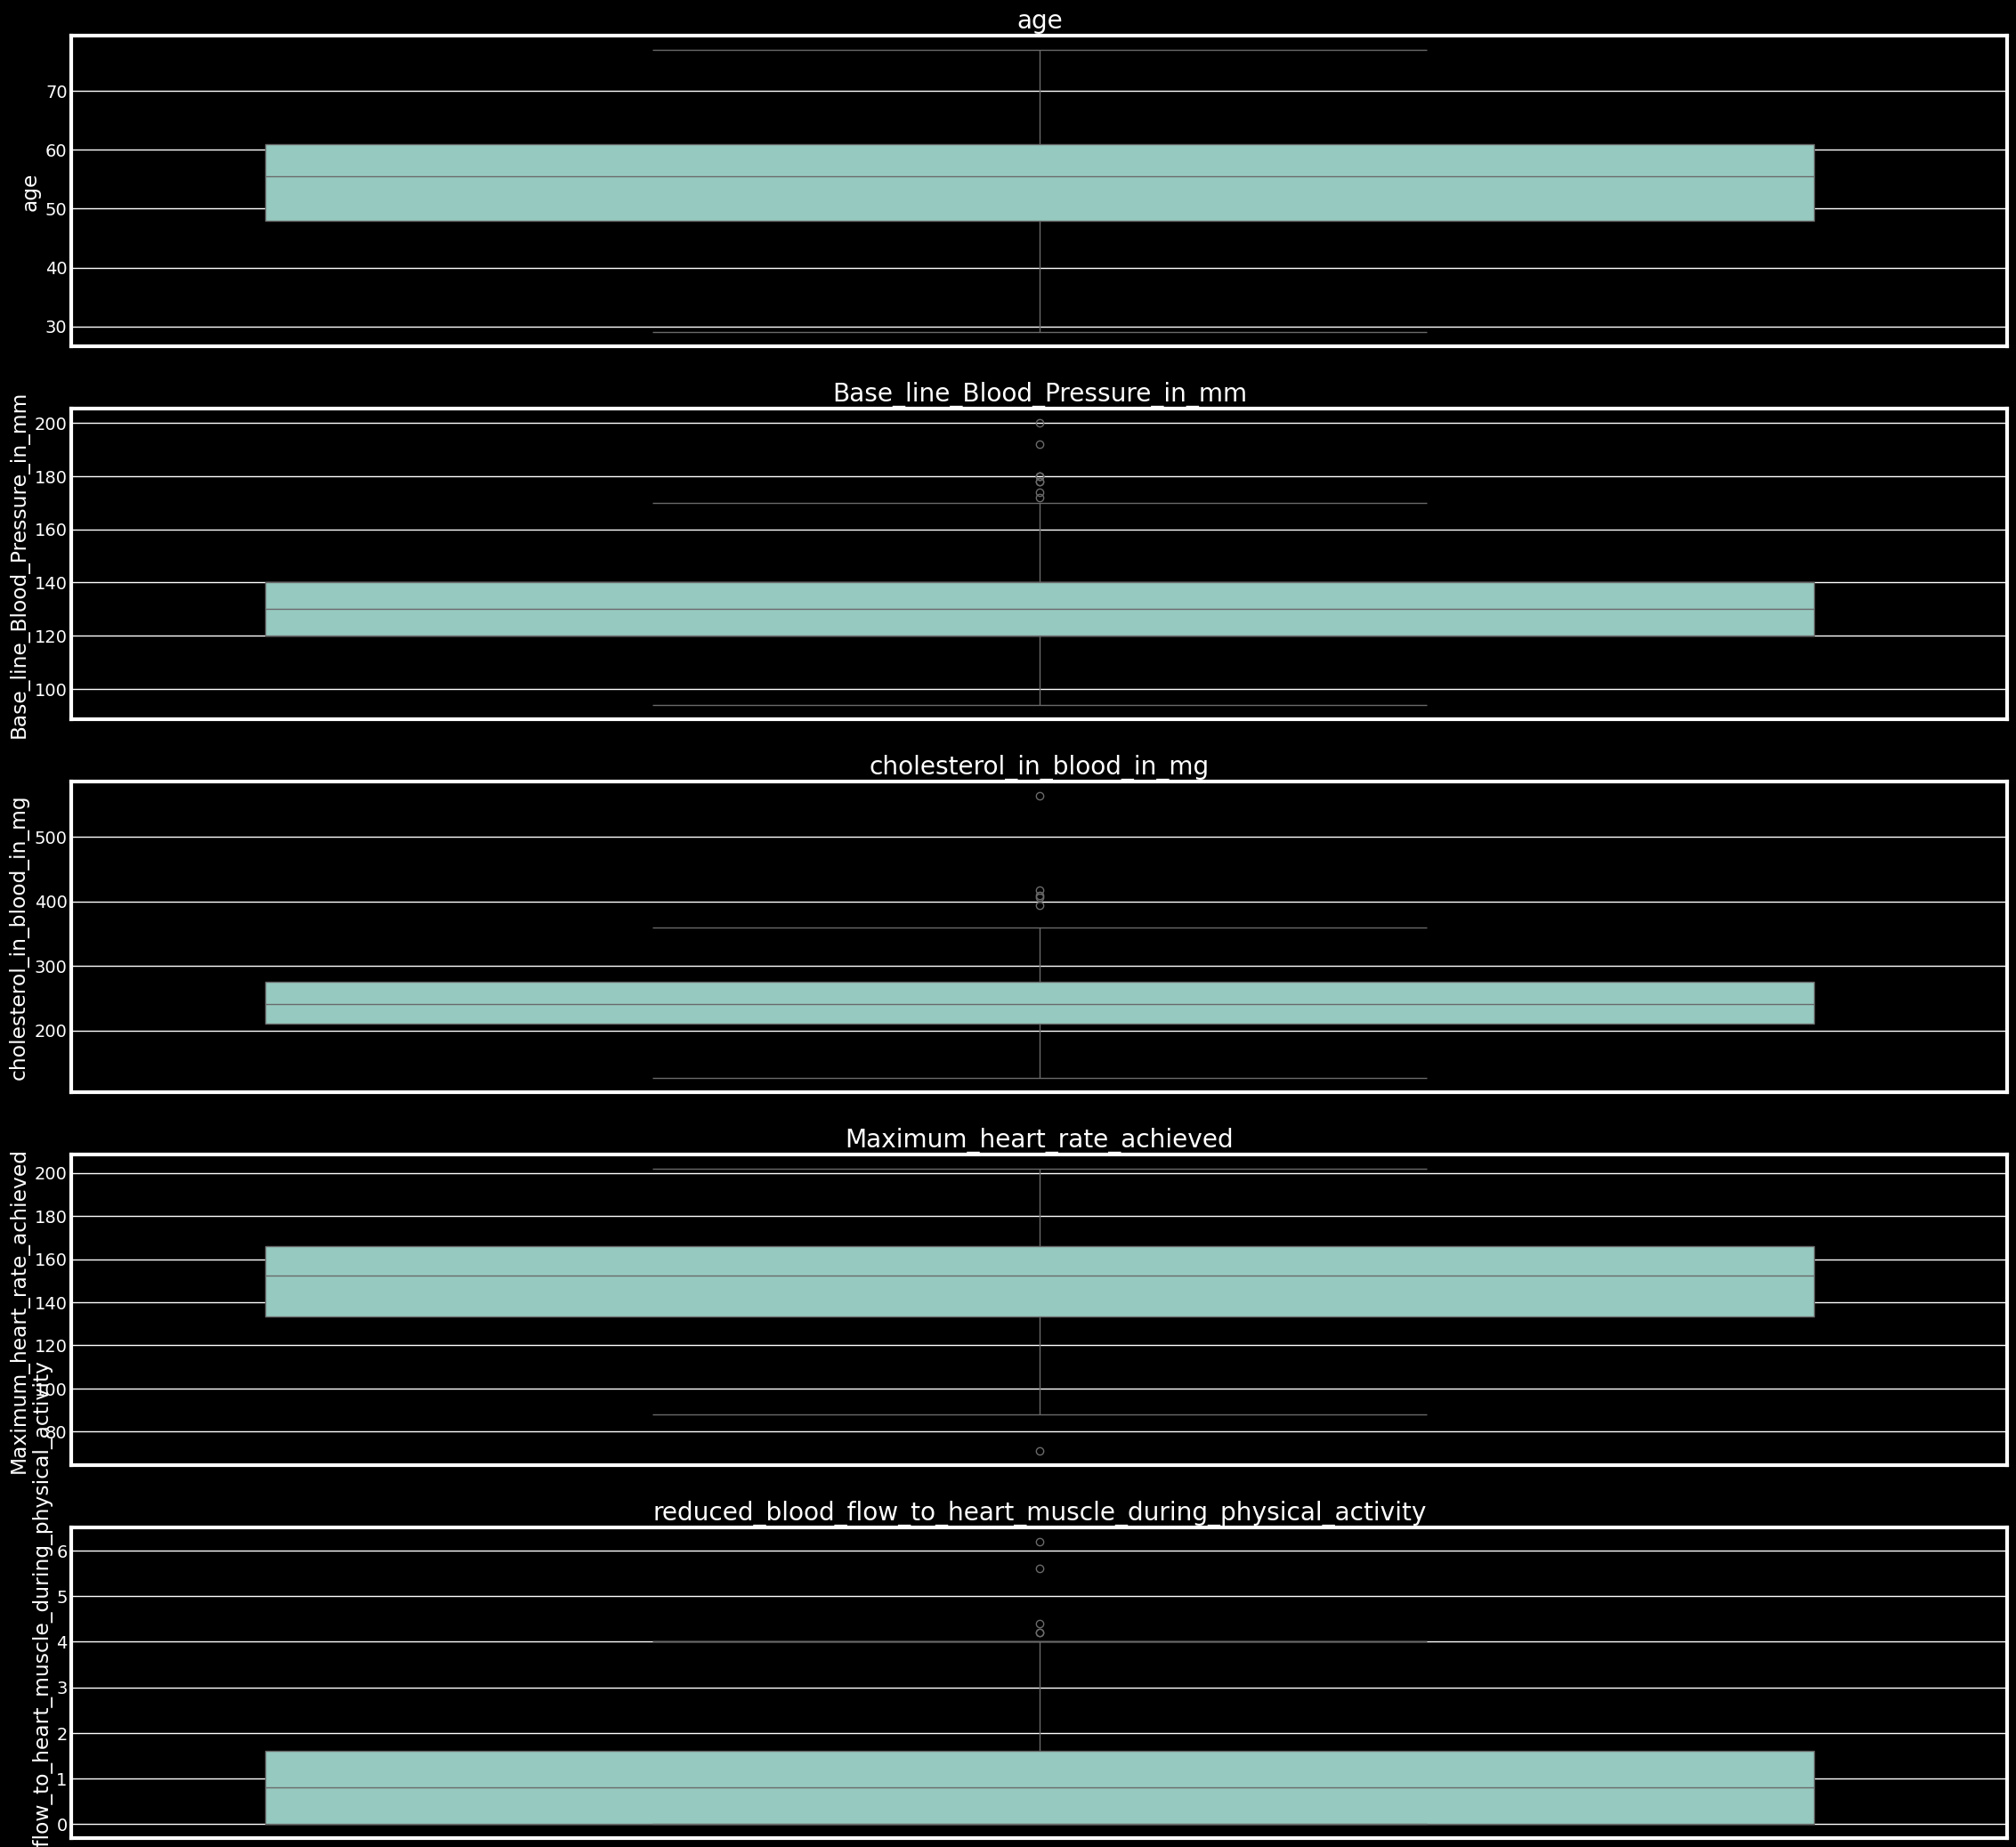

In [15]:
# Check for outliers using boxplot.

plt.figure(figsize = (25,25))
for index,col_name in enumerate(conti_vr):
  plt.subplot(5,1,index+1)
  sns.boxplot(dt[col_name])
  plt.title(col_name)

There are outliers in **`right skewed`** distributed data Variabels.

In [16]:
# Iqr range for outliers removal.

for i in conti_vr:
  q1,q3 = np.percentile(dt[i],25,axis = 0),np.percentile(dt[i],75,axis = 0)
  iqr = q3-q1
  ub,lb = q3+1.5*iqr,q1-1.5*iqr
  dt.drop(dt[dt[i]>ub].index,axis = 0,inplace = True)
  dt.drop(dt[dt[i]<lb].index,axis = 0,inplace = True)

In [17]:
# Shape after outlier removal.

dt.shape

(283, 14)

**Lets check each variable distibution for target class.**

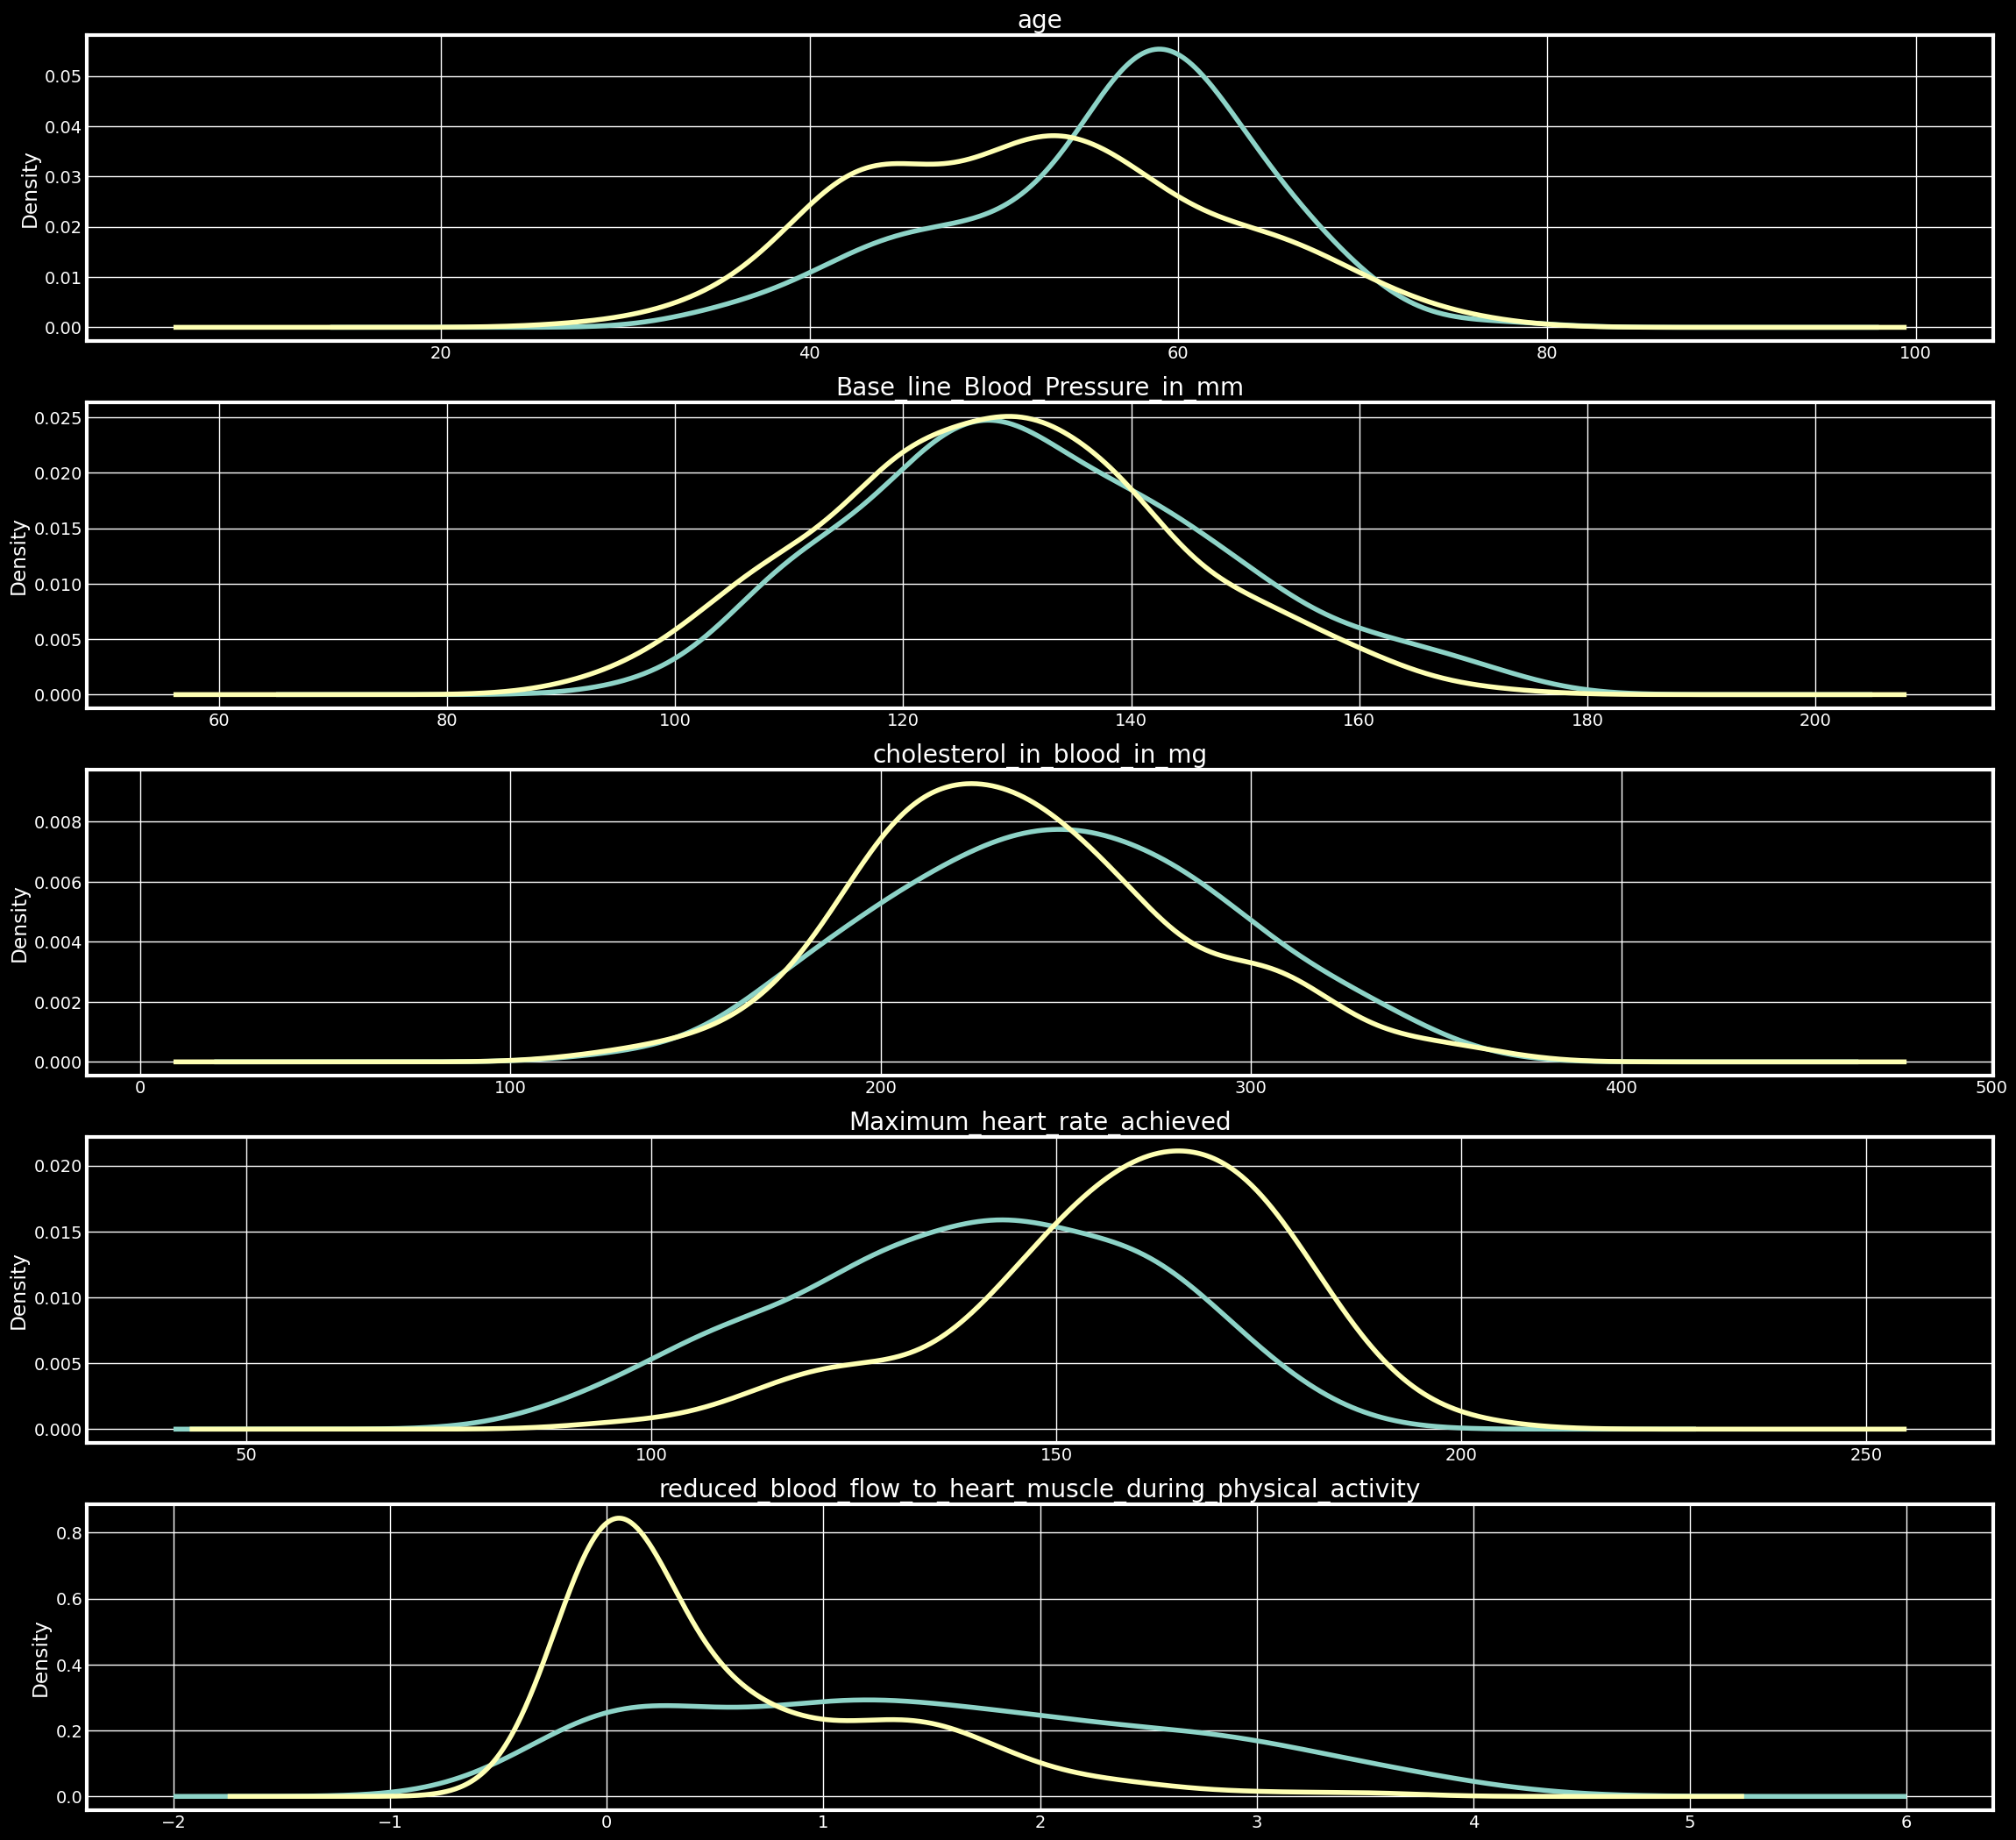

In [18]:
# extracting data with respect to classes.

plt.figure(figsize = (25,25))
for index,col_name in enumerate(conti_vr):
  clas_0_dt = dt[dt['target'] == 0][col_name]
  clas_1_dt = dt[dt['target'] != 0][col_name]

# Ploting distibution with respect to classes.
  plt.subplot(5,1,index+1)
  clas_0_dt.plot(kind = 'kde')
  clas_1_dt.plot(kind = 'kde')
  plt.title(col_name)

From above KDE plot the mean and variance is not changing for **Base_line_Blood_Pressure_in_mm** therefor this columns is not significant for heart attack cases, Also **cholesterol_in_blood_in_mg** shows a little variation lets check it via **ANOVA test**.

In [19]:
# Anova for relation between them.

from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols('target ~ age + Base_line_Blood_Pressure_in_mm + cholesterol_in_blood_in_mg + Maximum_heart_rate_achieved + reduced_blood_flow_to_heart_muscle_during_physical_activity',
data = dt).fit()
anova_table = sm.stats.anova_lm(model,type = 2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,3.452323,3.452323,19.175913,1.691890e-05
Base_line_Blood_Pressure_in_mm,1.0,0.211008,0.211008,1.172042,2.799235e-01
cholesterol_in_blood_in_mg,1.0,0.293744,0.293744,1.631598,2.025518e-01
Maximum_heart_rate_achieved,1.0,9.576359,9.576359,53.191843,3.186526e-12
reduced_blood_flow_to_heart_muscle_during_physical_activity,1.0,6.385036,6.385036,35.465656,7.847395e-09
Residual,277.0,49.869516,0.180034,NaN,NaN


for **age, Maximum_heart_rate_achieved, reduced_blood_flow_to_heart_muscle_during_physical_activity** p value is less than significant value (i,e 0.05) therefor **reject null hypothesis**(i,e vavriables are not related) and **accept alternative hypothesis** (i,e variable are related).

In [20]:
# for Base_line_Blood_Pressure_in_mm & cholesterol_in_blood_in_mg the exponent value seems very small lets check them.

exp_val = [2.799235e-01, 2.025518e-01]
flt_val = np.array(exp_val,dtype = float)
flt_val

array([0.2799235, 0.2025518])

Above values shows for **Base_line_Blood_Pressure_in_mm & cholesterol_in_blood_in_mg** p value is more than significant value (i,e 0.05) therefor **fail to reject null hypothesis**(i,e variables are not related).

In [21]:
# Drop non significant variables.

dt.drop(['Base_line_Blood_Pressure_in_mm','cholesterol_in_blood_in_mg'],axis = 1,inplace = True)



# Shape after drop.

dt.shape

(283, 12)

In [22]:
# Removing deleted columns name from conti_vr list.

conti_vr.remove('Base_line_Blood_Pressure_in_mm')
conti_vr.remove('cholesterol_in_blood_in_mg')
conti_vr

['age',
 'Maximum_heart_rate_achieved',
 'reduced_blood_flow_to_heart_muscle_during_physical_activity']

In [23]:
# Creating a list for all columns in of data.
all_vr = list(dt.columns)

# Removing non categorical variables from columns list.

for col in conti_vr:
  all_vr.remove(col)

# Renaming the list.

cata_vr = all_vr
cata_vr

['sex',
 'Chest_pain_type',
 'blood_sugar_higher_than_normal_rang',
 'ECG_at_rest',
 'pain_when_heart_muscle_does_not_get_enough_oxygen_during_physical_activity',
 'slope',
 'Number_of_major_vessels_colored_by_fluoroscopy',
 'Maximum_heart_rate_condition_class',
 'target']

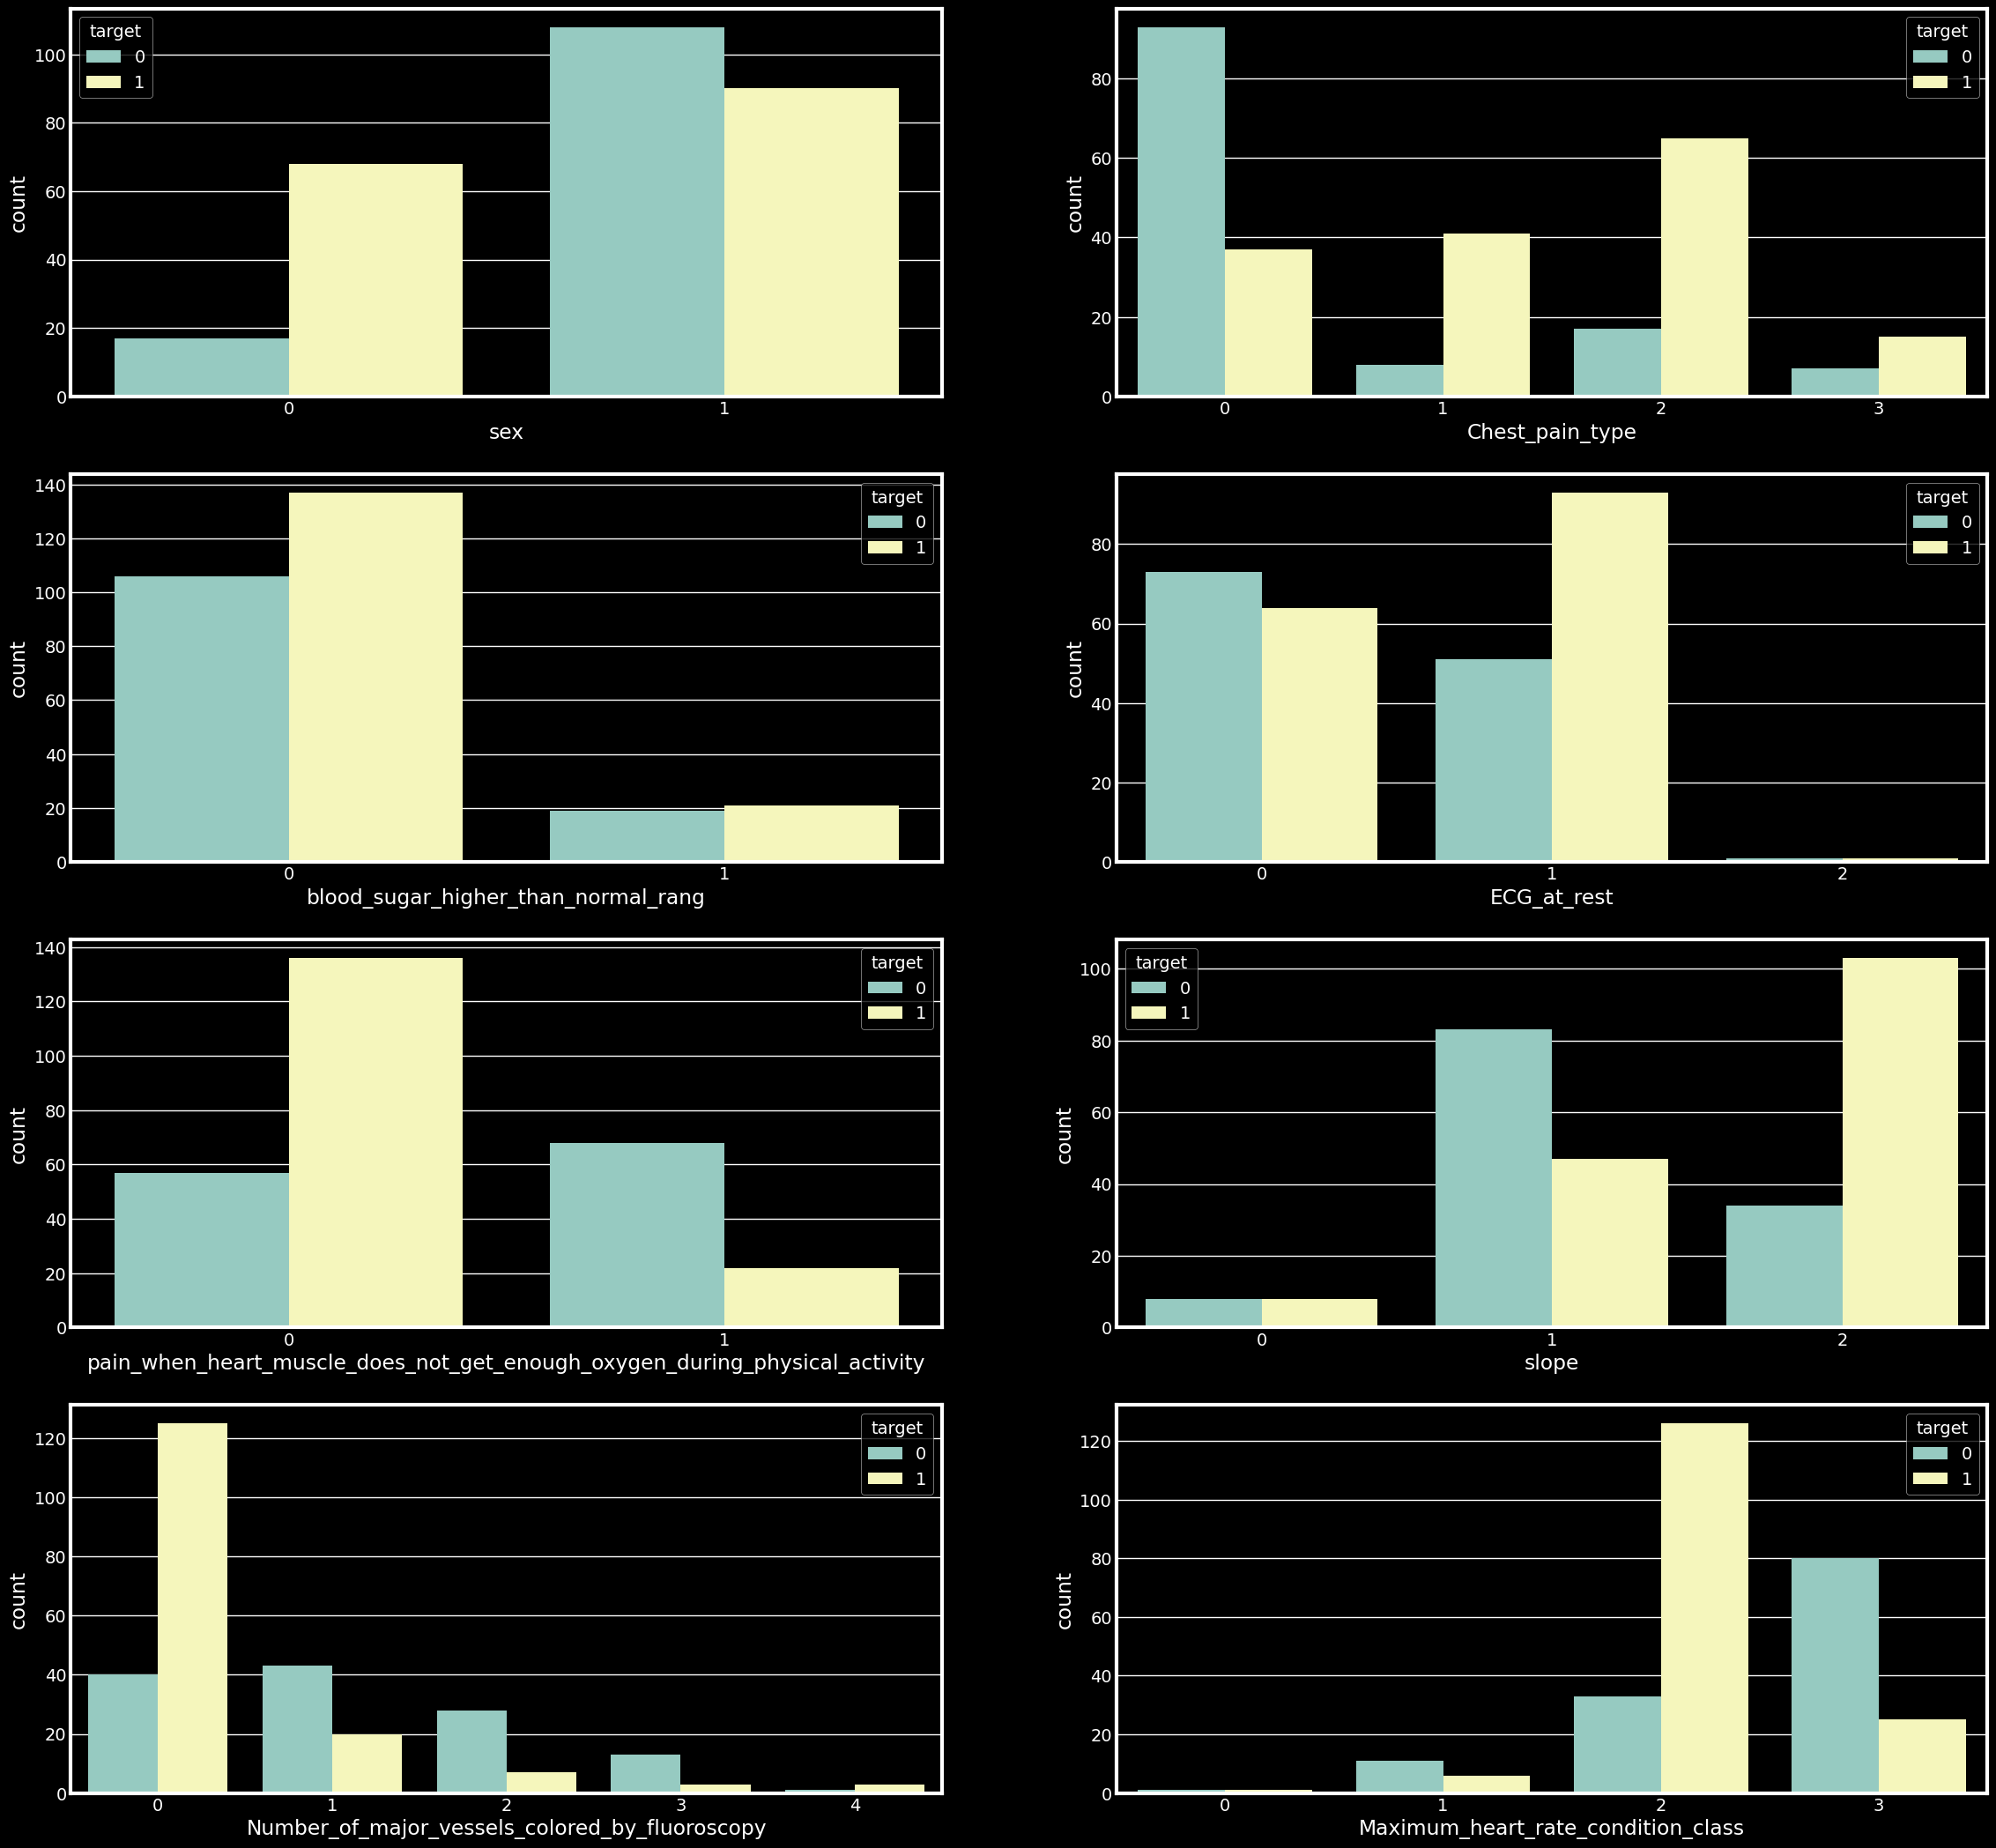

In [24]:
# ploting each class counts with respect to target class.

plt.figure(figsize = (25,25))
for index,col_name in enumerate(cata_vr[:-1]):     # Last column is not included because it is target variable.
  plt.subplot(4,2,index+1)
  sns.countplot(data=dt, x = col_name, hue='target')

**Count plot observations**

for **`sex`** shows that **Males** faces less number of heart attacks problems whereas **female** faces more number of heart attacks.

for **`Chest_pain_type`** shows that Chest pain of **type 2 have the max number of heart attack problem**, **type 1 have second heighest heart attacks**, **type 0 has 3rd and type 4 has least number of heart attacks**. Intrestingly **type 1, 2 & 3 has the most heart attacks probability** Whereas **type 0 has least heart attacks probability** because *`no heart
 attack entries are more for type 0(i,e : no pain)`* This implies there are other cause of heart attack but with less relation than Chest_pain_type.

for **`blood_sugar_higher_than_normal_rang`** shows that for sugar level more than normal is not significant for heart attack predictions at all **Even Heart Attacks chances are more for non
sugar patients**. Therefor this variable is not related.

for **`ECG_at_rest`** shows that Probability for **heart attack** is **low** for **normal(0)** ECG_at_rest class, **high** for **abnormal(1)** class and equal for **not giving(3)** class.
Therefor ECG_at_rest is high correlated

for **`pain_when_heart_muscle_does_not_get_enough_oxygen_during_physical_activity`** shows that when there is **no pain** class for this variable the heart attack cases
are more than non heart attacks cases. Therefor this variable is not related.

for slope class **0 & 1** the count for ***non heart attacks are more than heart attacks*** and for **2** class the ***heart attack count is more than non heart attack*** Therefor
this variable is related to target variable.

for all the ***active classes*** of **Number_of_major_vessels_colored_by_fluoroscopy** the count for **Non heart attack is more than heart attack** where as for ***non active class*** results
are opposite. Therefor this variable is not related.

for class 2 of **Maximum_heart_rate_condition_class** **heart attack** count is **more** and **less** for **all other classes**. Therefor **Maximum_heart_rate_condition_class** is related
but less than other selected columns.

In [25]:
# Not related columns list.

to_drop = ['blood_sugar_higher_than_normal_rang','pain_when_heart_muscle_does_not_get_enough_oxygen_during_physical_activity',
             'Number_of_major_vessels_colored_by_fluoroscopy']

dt.drop(to_drop,axis = 1,inplace = True)

In [26]:
for i in to_drop:
  cata_vr.remove(i)
cata_vr[:-1]

['sex',
 'Chest_pain_type',
 'ECG_at_rest',
 'slope',
 'Maximum_heart_rate_condition_class']

There are only 5 significant categorical columns out of 9. And last one is target variable.

In [27]:
# shape after non significant catagorical variables are removed.

dt.shape

(283, 9)

There are **`9` variables** in total out of which **`5` are catagorical**, **`3` are continuous** and **`1` is target variables**

### Modeling

In [28]:
# Separate feature and target.

x = dt.drop('target', axis = 1)
y = dt['target']



In [29]:
# data spliting.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size= 0.7, random_state = 23)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
# scaling features and target.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_tr_sc = sc.fit_transform(x_train.copy())
x_ts_sc = sc.fit_transform(x_test.copy())

(198, 8) (198,) (85, 8) (85,)


#### Logistic Regression Model.

In [30]:
# importing logistic regression and fitting data into it .

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_tr_sc,y_train)

LogisticRegression()

In [31]:
# Making predictions.

predic_ts = lg.predict(x_ts_sc)
predic_tr = lg.predict(x_tr_sc)
print(predic_ts.shape,predic_tr.shape)

(85,) (198,)


In [32]:
# Confusion matrix on train set.

pd.crosstab(predic_tr,y_train,rownames = ['predicted'],colnames = ['actual'])

actual,0,1
predicted,,
0,72,11
1,20,95


There are **`20`False positive** and **`11` false negetive** for train set.

In [33]:
# Classification Report for train set predictions.

from sklearn.metrics import classification_report
print(classification_report(predic_tr,y_train))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        83
           1       0.90      0.83      0.86       115

    accuracy                           0.84       198
   macro avg       0.84      0.85      0.84       198
weighted avg       0.85      0.84      0.84       198



In [34]:
# Confusion metrix for test set predictions.

pd.crosstab(predic_ts,y_test,rownames = ['predicted'],colnames = ['Actual'])

Actual,0,1
predicted,,
0,25,9
1,8,43


There are **`8` False positive** and **`9` False negetive** for test set.

In [35]:
# Classification Report for test set predicions.

from sklearn.metrics import classification_report
print(classification_report(predic_ts,y_test))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        34
           1       0.83      0.84      0.83        51

    accuracy                           0.80        85
   macro avg       0.79      0.79      0.79        85
weighted avg       0.80      0.80      0.80        85



Precision, Recall & f1 score decreases for test set prediction this means **`model is over fitted`** for both classes.

#### Random Forest Classifier

In [36]:
# defining random forest classifier.

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [37]:
# gridsearch for best param.

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[500,100,1000,200,50]}
gdcv = GridSearchCV(estimator = rfc,param_grid = parameters,n_jobs = 7,cv = 3, scoring=['precision', 'recall', 'f1'], refit='f1')
gdcv.fit(x_tr_sc,y_train)


# Print the best parameters and score
print("Best parameters: ", gdcv.best_params_)
print("Best score: ", gdcv.best_score_)

Best parameters:  {'n_estimators': 100}
Best score:  0.8186069277618574


n_estimators =  **100** is thes optimum value

In [38]:
# using parameters accordrding to GridSearchCV.


rfc = RandomForestClassifier(n_jobs = 7,n_estimators = 100,random_state = 24,max_leaf_nodes= 2)
rfc.fit(x_tr_sc,y_train)

RandomForestClassifier(max_leaf_nodes=2, n_jobs=7, random_state=24)

In [39]:
# Making predictions.

predic_ts = rfc.predict(x_ts_sc)
predic_tr = rfc.predict(x_tr_sc)
print(predic_ts.shape,predic_tr.shape)

(85,) (198,)


In [40]:
# Confusion matrix on train set.

pd.crosstab(predic_tr,y_train,rownames = ['predicted'],colnames = ['actual'])

actual,0,1
predicted,,
0,65,11
1,27,95


There are **`27`False positive** and **`11` false negetive** for train set.

In [41]:
# Classification Report for train set predictions.

from sklearn.metrics import classification_report
print(classification_report(predic_tr,y_train))

              precision    recall  f1-score   support

           0       0.71      0.86      0.77        76
           1       0.90      0.78      0.83       122

    accuracy                           0.81       198
   macro avg       0.80      0.82      0.80       198
weighted avg       0.82      0.81      0.81       198



In [42]:
# Confusion metrix for test set predictions.

pd.crosstab(predic_ts,y_test,rownames = ['predicted'],colnames = ['Actual'])

Actual,0,1
predicted,,
0,22,8
1,11,44


There are **`11` False positive** and **`8` False negetive** for test set.

In [43]:
# Classification Report for test set predicions.

from sklearn.metrics import classification_report
print(classification_report(predic_ts,y_test))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        30
           1       0.85      0.80      0.82        55

    accuracy                           0.78        85
   macro avg       0.76      0.77      0.76        85
weighted avg       0.78      0.78      0.78        85



Random forest is **`good`** for  **males (class 1)** but **`overfitted`** for **females (class 0)**